In [29]:
# Install necessary libraries if missing
!pip install scikit-learn matplotlib seaborn

In [30]:
import pandas as pd

# Upload file manually
from google.colab import files
uploaded = files.upload()

# Load the uploaded file
data = pd.read_csv(list(uploaded.keys())[0])

# Show first 5 rows
data.head()


Saving Dataset.csv to Dataset (4).csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,927241,M,20.600000,29.330000,140.100000,1265.000000,0.117800,0.277000,0.351400,0.152000,...,25.740000,39.420000,184.600000,1821.000000,0.165000,0.868100,0.938700,0.265000,0.408700,0.124000
1,911321259,M,17.168309,19.964760,134.771325,1048.050982,0.089070,0.057979,0.074981,0.056557,...,19.882724,24.693655,133.090410,1227.958020,0.122413,0.116007,0.229155,0.119309,0.232415,0.056937
2,911321284,B,12.009371,29.214541,75.939015,460.369952,0.082269,0.064649,0.042277,0.019694,...,13.465344,38.856302,85.359527,480.655599,0.122928,0.186702,0.179319,0.076729,0.233408,0.079142
3,864685,B,11.930000,21.530000,76.530000,438.600000,0.097680,0.078490,0.033280,0.020080,...,13.670000,26.150000,87.540000,583.000000,0.150000,0.239900,0.150300,0.072470,0.243800,0.085410
4,911201,B,14.530000,13.980000,93.860000,644.200000,0.109900,0.092420,0.068950,0.064950,...,15.800000,16.930000,103.100000,749.900000,0.134700,0.147800,0.137300,0.106900,0.260600,0.078100


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop ID column if exists
if 'id' in data.columns:
    data = data.drop('id', axis=1)

# Encode the target variable
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Split features and labels
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Train-Test Split (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [32]:
from sklearn.impute import SimpleImputer

# Create an imputer
imputer = SimpleImputer(strategy='mean')

# Fit on X and transform
X = imputer.fit_transform(X)

# Train-test split again
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling (because KNN needs it)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



Accuracy: 0.9737


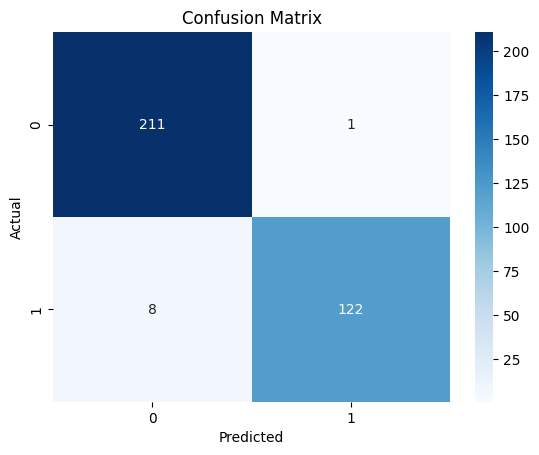

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       212
           1       0.99      0.94      0.96       130

    accuracy                           0.97       342
   macro avg       0.98      0.97      0.97       342
weighted avg       0.97      0.97      0.97       342



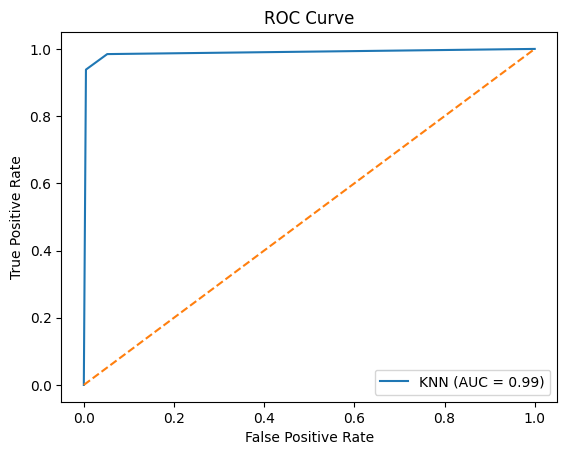

In [33]:
from sklearn.neighbors import KNeighborsClassifier

# Step 1 - Re-instantiate the model
knn = KNeighborsClassifier(n_neighbors=2)

# Step 2 - Train model
knn.fit(X_train, y_train)

# Step 3 - Now you can Predict
y_pred = knn.predict(X_test)

# Step 4 - Evaluate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# ROC Curve
y_prob = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


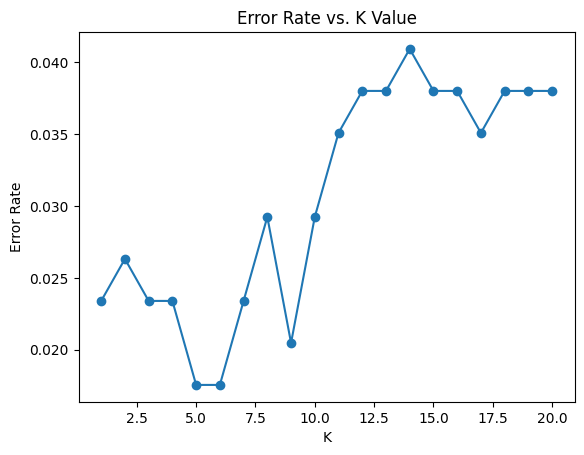

In [34]:
error_rates = []

# Test k values from 1 to 20
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred_k)
    error_rates.append(error)

# Plot Error Rate vs. K Value
plt.plot(range(1,21), error_rates, marker='o')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
